<a href="https://colab.research.google.com/github/menon92/DL-Sneak-Peek/blob/master/audio/audio_feature_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -q https://github.com/menon92/BangalASR/raw/main/data/test-samples/test_wav/070078fb60.wav

In [2]:
import librosa
from matplotlib import pyplot as plt
import IPython.display as ipd

In [3]:
audio_path = "070078fb60.wav"

# play audio file
ipd.Audio(audio_path)

In [4]:
y, sr = librosa.load(audio_path, sr=16000)

print(f"sample rate: {sr}")
print(f"data shape: {y.shape}")

sample rate: 16000
data shape: (76800,)


In [5]:
plt.rcParams["figure.figsize"] = (20, 3)

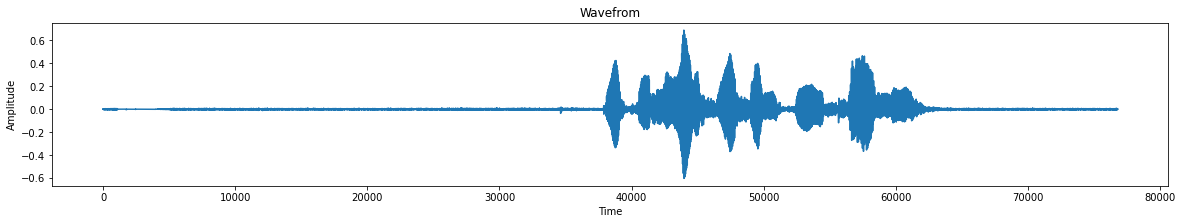

In [6]:
plt.plot(y)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Wavefrom")
plt.show()

In [7]:
mfcc_feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

In [8]:
print(mfcc_feature.shape)

(40, 151)


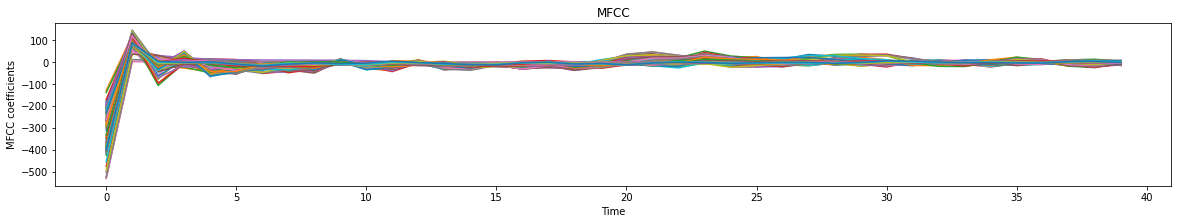

In [9]:
plt.plot(mfcc_feature)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.title("MFCC")
plt.show()

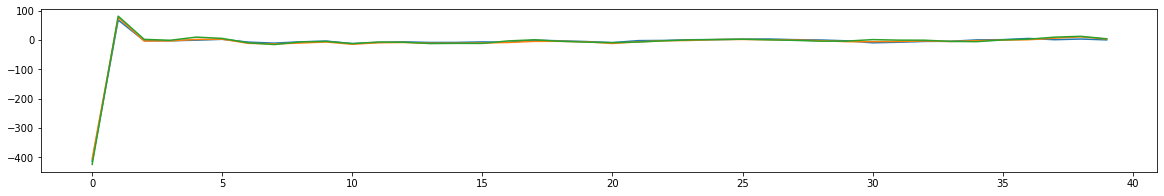

In [10]:
plt.plot(mfcc_feature[:,:3])
plt.show()

(5, 156)


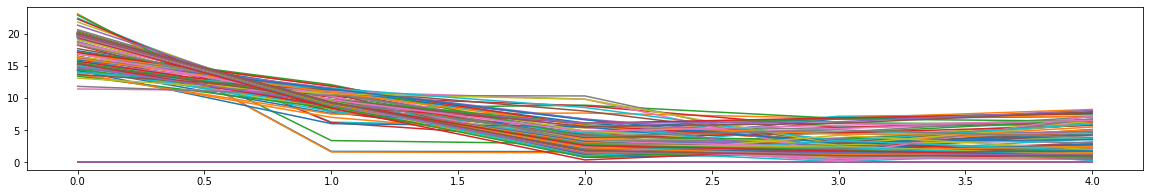

In [11]:
import numpy as np

x = np.power(np.abs(mfcc_feature), 0.5)
pad_len = 5
x = np.pad(x, ([0, 5], [5, 0]), "constant", constant_values=0)[:pad_len,:]
print(x.shape)
plt.plot(x)
plt.show()

In [20]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf


audio = tf.io.read_file(audio_path)
audio, _ = tf.audio.decode_wav(audio, 1)
audio = tf.squeeze(audio, axis=-1)
stfts = tf.signal.stft(audio, frame_length=200, frame_step=80, fft_length=256)
x = tf.math.pow(tf.abs(stfts), 0.5)

In [21]:
print(x.shape)

(958, 129)


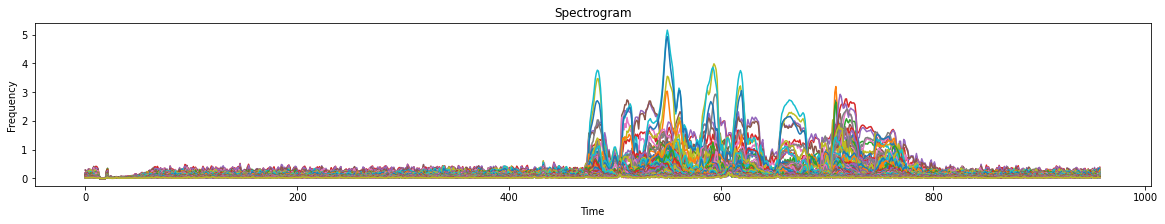

In [22]:
plt.plot(x)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram")
plt.show()

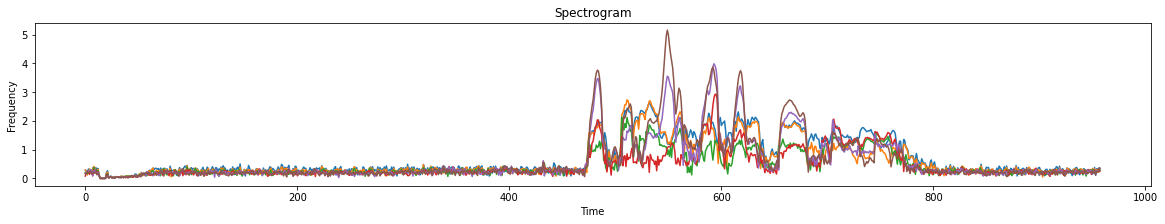

In [23]:
plt.plot(x[:,4:10])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram")
plt.show()

In [30]:
log_x = tf.math.log(x).numpy()
print(log_x.shape)

(958, 129)


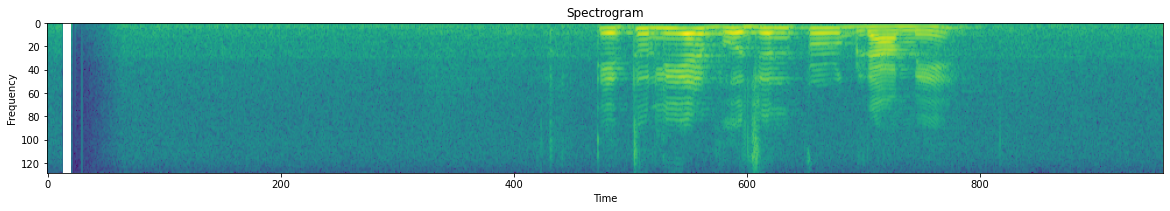

In [36]:
# show spectogram as image
plt.rcParams["figure.figsize"] = (20, 5)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram")
plt.imshow(log_x.T)

In [37]:
log_x.T.shape

(129, 958)

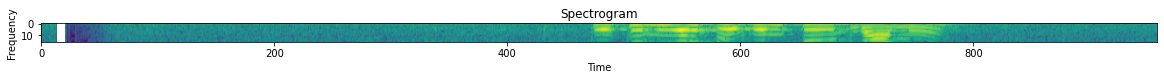

In [42]:
# plot only 4 to 20 frequencys
plt.rcParams["figure.figsize"] = (20, 5)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Spectrogram")
spectogram = log_x.T
spectogram = spectogram[4:20,:]
plt.imshow(spectogram)